<a href="https://colab.research.google.com/github/fhaarn/capres-sna-on-x/blob/main/capres_sna_oop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random
import networkx as nx
import re
import matplotlib.pyplot as plt

#Class & Random Node Generator
deklarasi class dan generate node dari reply, retweet dan quote

In [2]:
nama_1 = ['Pandu', 'Gusti', 'Munikasari', 'Izhar', 'Bagir', 'Deka', 'Satria', 'Fitra', 'Deristya', 'Hidayatullah', 'Maruto', 'Hizrian', 'Riyadie', 'Zulfi', 'Ruslian', 'Fikri', 'Riany', 'Fahdnul', 'Listyani', 'Geraldi', 'Cansan', 'Deristya', 'Lendy', 'Usra']
nama_2 = ['Gusti', 'Bagir', 'Satria', 'Deristya', 'Hizrian', 'Ruslian', 'Riany', 'Listyani', 'Cansan', 'Lendy', 'Haq', 'Risyad', 'Oktaviani', 'Resa', 'Sunanto', 'Rahardianto', 'Husnah', 'Amaliya', 'Priatni', 'Fauzunuria', 'Anwisa', 'Pradana', 'Wahyuningtias', 'Apriyani', 'Simorangkir', 'Varensia', 'Ashim', 'Ihatrayudha', 'Tursia', 'Ulfania', 'Apriyanto', 'Destrya', 'Fiona', 'Tabriiz', 'Tobing', 'Umaeroh', 'Atarita', 'Kama', 'Husein', 'Dyarini', 'Falah', 'Noviana', 'Sasna', 'Widyasmoro', 'Pamungkas', 'Shabrina', 'Rohani', 'Prayoga', 'Arieska', 'Erditya', 'Sunday', 'Ersyahputra', 'Syabantika', 'Wahyudi', 'Nurfitria', 'Hidayat', 'Nisrina', 'Anggraini', 'Jaelani', 'Maulidah']
nama_array = nama_1 + nama_2

In [3]:
def generate_username(array_nama):
    # Menentukan panjang nama antara 2 dan 3 kata
    panjang_nama = random.randint(2, 3)

    # Memilih nama secara acak dari array_nama
    nama_acak = random.sample(array_nama, panjang_nama)

    # Menggabungkan nama menjadi satu string tanpa spasi
    nama_lengkap = ''.join(nama_acak)

    if random.choice([True, False]):
        angka = random.randint(1, 100)
        nama_lengkap += str(angka)

    return nama_lengkap

In [4]:
class TwitterGraph:
    def __init__(self, data):
        self.df = pd.DataFrame(data)
        self.G = nx.DiGraph()

    def drop_unused_features(self):
        # Drop unused features
        unused_features = set(self.df.columns) - {'username', 'full_text', 'reply_count', 'retweet_count', 'quote_count', 'mention_list','feature_indegree'}
        self.df.drop(columns=unused_features, inplace=True)

    def add_nodes_and_edges(self):
        for _, row in self.df.iterrows():
            for mention_user in row['mention_list']:
                self.G.add_edge(row['username'], mention_user)

    def generate_new_data(self):
        new_data = []
        for _, row in self.df.iterrows():
            feature_indegree = row['feature_indegree']
            for i in range(feature_indegree):
                new_data.append({
                    'username': generate_username(nama_array),
                    'full_text': '',
                    'reply_count': 0,
                    'retweet_count': 0,
                    'quote_count': 0,
                    'feature_indegree': 0,
                    'mention_list': [row['username']]
                })
        return new_data

    def add_new_data_to_dataframe(self, new_data):
        self.df = pd.concat([self.df, pd.DataFrame(new_data)], ignore_index=True)

    def calculate_feature_indegree(self):
        self.df['feature_indegree'] = self.df.apply(lambda row: row['reply_count'] + row['retweet_count'] + row['quote_count'], axis=1)

    def extract_mention_list_from_text(self):
        self.df['mention_list'] = self.df['full_text'].apply(lambda x: re.findall(r'@(\w+)', str(x)))

    def calculate_centralities(self):
        betweenness_centrality = nx.betweenness_centrality(self.G)
        in_degree_centrality = nx.in_degree_centrality(self.G)
        out_degree_centrality = nx.out_degree_centrality(self.G)
        degree_centrality = nx.degree_centrality(self.G)
        closeness_centrality = nx.closeness_centrality(self.G)
        eigenvector_centrality = nx.eigenvector_centrality(self.G, max_iter=500)

        centrality_df = pd.DataFrame({
            'Node': list(self.G.nodes),
            'Betweenness Centrality': [betweenness_centrality[node] for node in self.G.nodes],
            'In-Degree Centrality': [in_degree_centrality[node] for node in self.G.nodes],
            'Out-Degree Centrality': [out_degree_centrality[node] for node in self.G.nodes],
            'Degree Centrality': [degree_centrality[node] for node in self.G.nodes],
            'Closeness Centrality': [closeness_centrality[node] for node in self.G.nodes],
            'Eigenvector Centrality': [eigenvector_centrality[node] for node in self.G.nodes],
        })

        return centrality_df

    def display_centrality_measurement(self, centrality_df):
        centrality_measurement = ['Betweenness Centrality', 'In-Degree Centrality', 'Out-Degree Centrality', 'Degree Centrality', 'Closeness Centrality', 'Eigenvector Centrality']
        # pd.set_option('display.max_rows', 10)
        for i in centrality_measurement:
            df_centrality = centrality_df[['Node', i]]
            df_centrality = df_centrality.sort_values(by=i, ascending=False)
            df_centrality = df_centrality.reset_index(drop=True)
            display(df_centrality.head(10))
        # pd.reset_option('display.max_rows')



    def visualize_graph(self):
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10)
        plt.show()

#Anies dataset


In [5]:
# read dataset
df_anies = pd.read_csv("/content/anies.csv", sep = ';')
print(len(df_anies))

1502


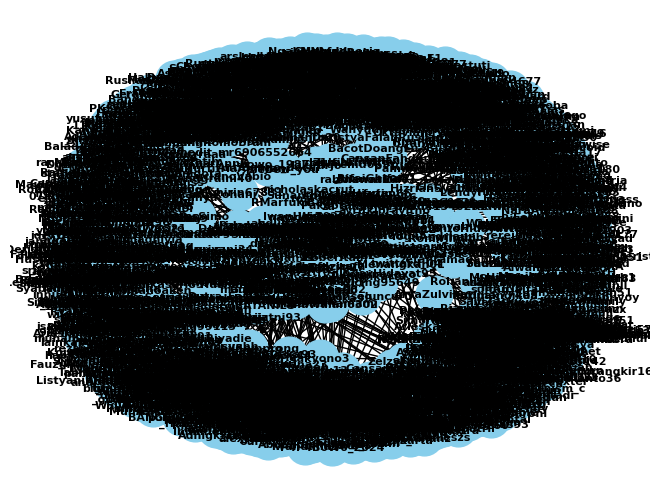

In [6]:
# Create TwitterGraph instance
anies_graph = TwitterGraph(df_anies)

# Calculate feature_indegree(for generating node)
anies_graph.calculate_feature_indegree()

# Drop unused feeature
anies_graph.drop_unused_features()

# Extract mention_list from mention on text
anies_graph.extract_mention_list_from_text()

# Generate new random node
new_data = anies_graph.generate_new_data()

# Add new node to DataFrame
anies_graph.add_new_data_to_dataframe(new_data)

# Add nodes and edges
anies_graph.add_nodes_and_edges()

# Collect centrality measurement
anies_centrality = anies_graph.calculate_centralities()

# Visualize the graph
anies_graph.visualize_graph()

##Centrality Measurement

In [7]:
anies_graph.display_centrality_measurement(anies_centrality)

,Node,Betweenness Centrality
0,aniesbaswedan,0.000064
1,f_wandal3,0.000019
2,bro_munozz,0.000010
3,viverepericls,0.000008
4,muchlis_ar,0.000007
5,MaxJo777,0.000006
6,ironmxn6,0.000006
7,Tjel0up,0.000005
8,everyoneislier,0.000005
9,renita_hartini,0.000004


,Node,In-Degree Centrality
0,aniesbaswedan,0.124833
1,Reiza_Patters,0.045029
2,Arie_Kriting,0.032992
3,rihandaulah,0.018279
4,muchlis_ar,0.016496
5,tempodotco,0.014267
6,awemany,0.014267
7,imanlagi,0.014267
8,NOTASLIMBOY,0.013375
9,ironmxn6,0.012929


,Node,Out-Degree Centrality
0,YayiekY,0.005796
1,f_wandal3,0.005796
2,gatau_puyeng,0.005350
3,itsmeurlove16,0.004904
4,kawitah79,0.004904
5,muhidweet,0.004904
6,maryusu76023636,0.004904
7,irvanasir,0.004904
8,Aliensa10,0.004458
9,Ndremu669,0.004458


,Node,Degree Centrality
0,aniesbaswedan,0.125279
1,Reiza_Patters,0.045029
2,Arie_Kriting,0.032992
3,rihandaulah,0.018279
4,muchlis_ar,0.016942
5,imanlagi,0.014267
6,tempodotco,0.014267
7,awemany,0.014267
8,NOTASLIMBOY,0.013375
9,ironmxn6,0.013375


,Node,Closeness Centrality
0,aniesbaswedan,0.126739
1,kojekrapbetawi,0.067730
2,Reiza_Patters,0.045129
3,Arie_Kriting,0.033745
4,rihandaulah,0.018279
5,tvOneNews,0.017770
6,imanlagi,0.017438
7,muchlis_ar,0.016496
8,Hasbil_Lbs,0.014867
9,awemany,0.014267


,Node,Eigenvector Centrality
0,kumparan,0.652671
1,viverepericls,0.403373
2,fmyvfnkoig,0.403373
3,S4triaBaj4,0.249298
4,udahdebut,0.249298
5,akun_0987654321,0.249298
6,ImAShyPerson820,0.249298
7,VIVAcoid,0.000566
8,strike_bravo_b,0.000509
9,alextham878,0.000283


#Prabowo dataset


In [8]:
# read dataset
df_prabowo = pd.read_csv("/content/prabowo.csv", sep = ';')
print(len(df_prabowo))

1500


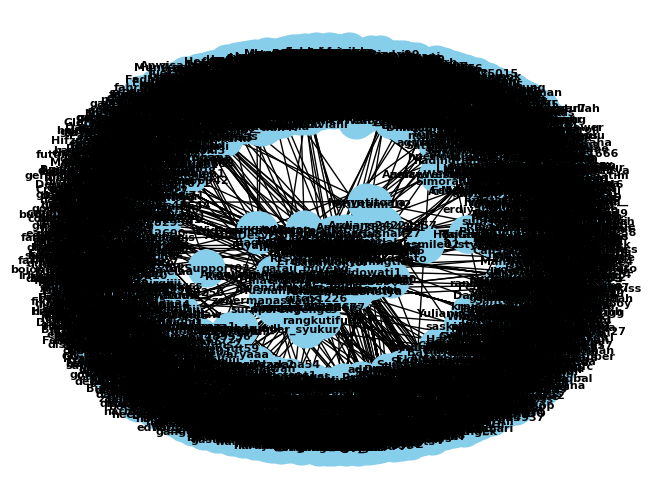

In [9]:
# Create TwitterGraph instance
prabowo_graph = TwitterGraph(df_prabowo)

# Calculate feature_indegree(for generating node)
prabowo_graph.calculate_feature_indegree()

# Drop unused feeature
prabowo_graph.drop_unused_features()

# Extract mention_list from mention on text
prabowo_graph.extract_mention_list_from_text()

# Generate new random node
new_data = prabowo_graph.generate_new_data()

# Add new node to DataFrame
prabowo_graph.add_new_data_to_dataframe(new_data)

# Add nodes and edges
prabowo_graph.add_nodes_and_edges()

# Collect centrality measurement
prabowo_centrality = prabowo_graph.calculate_centralities()

# Visualize the graph
prabowo_graph.visualize_graph()

##Centrality Measurement

In [10]:
prabowo_graph.display_centrality_measurement(prabowo_centrality)

,Node,Betweenness Centrality
0,gusniindera,3.250451e-05
1,hanny23ae,1.441377e-05
2,13babpanda,3.676981e-06
3,grupchavez,2.647426e-06
4,Rakha_boumi,1.176634e-06
5,fabianjrit,7.353962e-07
6,Michojo2,5.883170e-07
7,muhammadsyakur2,5.883170e-07
8,rendi078,5.883170e-07
9,panjisapp,4.412377e-07


,Node,In-Degree Centrality
0,bangbonny_,0.064034
1,prabowo,0.022239
2,geloraco,0.015337
3,gibran_tweet,0.011887
4,Gerindra,0.009969
5,bengkeldodo,0.007285
6,PartaiSocmed,0.005752
7,tvOneNews,0.005752
8,ridwankamil,0.004985
9,ganjarpranowo,0.004985


,Node,Out-Degree Centrality
0,gusniindera,0.006518
1,guitar0512mi,0.006135
2,hanny23ae,0.005368
3,grupchavez,0.005368
4,AntoniCleo,0.005368
5,ekanzoy,0.004985
6,harasjoman,0.004985
7,gatau_puyeng,0.004601
8,LisWidowati1,0.004218
9,13babpanda,0.003834


,Node,Degree Centrality
0,bangbonny_,0.064034
1,prabowo,0.022239
2,geloraco,0.015337
3,gibran_tweet,0.011887
4,gusniindera,0.011503
5,Gerindra,0.009969
6,hanny23ae,0.008052
7,bengkeldodo,0.007285
8,guitar0512mi,0.006135
9,grupchavez,0.006135


,Node,Closeness Centrality
0,bangbonny_,0.064034
1,prabowo,0.024735
2,geloraco,0.015337
3,gibran_tweet,0.014361
4,Gerindra,0.012954
5,ganjarpranowo,0.008789
6,aniesbaswedan,0.008282
7,bengkeldodo,0.007304
8,PartaiSocmed,0.005752
9,tvOneNews,0.005752


,Node,Eigenvector Centrality
0,prabowo,0.365236
1,gibran_tweet,0.365201
2,PDI_Perjuangan,0.365158
3,psi_id,0.365131
4,SOERYAW4DI,0.365110
5,SayurLodehBTW2,0.365110
6,rinichan02,0.365110
7,Rakha_boumi,0.182555
8,tunnov,0.182555
9,Gerindra,0.000104


#Ganjar dataset


In [11]:
# read dataset
df_ganjar = pd.read_csv("/content/ganjar.csv", sep = ';')
print(len(df_ganjar))

1506


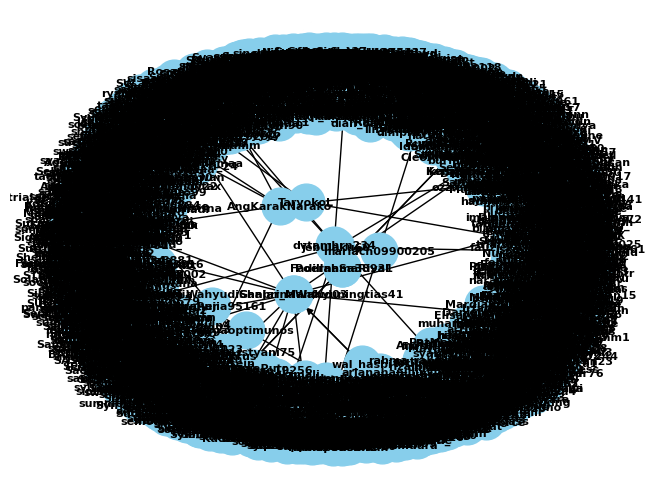

In [12]:
# Create TwitterGraph instance
ganjar_graph = TwitterGraph(df_ganjar)

# Calculate feature_indegree(for generating node)
ganjar_graph.calculate_feature_indegree()

# Drop unused feeature
ganjar_graph.drop_unused_features()

# Extract mention_list from mention on text
ganjar_graph.extract_mention_list_from_text()

# Generate new random node
new_data = ganjar_graph.generate_new_data()

# Add new node to DataFrame
ganjar_graph.add_new_data_to_dataframe(new_data)

# Add nodes and edges
ganjar_graph.add_nodes_and_edges()

# Collect centrality measurement
ganjar_centrality = ganjar_graph.calculate_centralities()

# Visualize the graph
ganjar_graph.visualize_graph()

##Centrality Measurement

In [13]:
ganjar_graph.display_centrality_measurement(ganjar_centrality)

,Node,Betweenness Centrality
0,Ganjar_Mahfud03,0.000003
1,Roberto41359052,0.000000
2,rravengger,0.000000
3,ginasabrinaaaa,0.000000
4,silber_rain,0.000000
5,BungacitrCitra,0.000000
6,SIITS2013,0.000000
7,Dekolainya,0.000000
8,Syarman59,0.000000
9,yoansptiani1,0.000000


,Node,In-Degree Centrality
0,ganjarpranowo,0.006268
1,okezonenews,0.003687
2,Nikmatul_Sg,0.003687
3,SINDOnews,0.002581
4,Ganjar_Mahfud,0.002581
5,antaranews,0.002212
6,sami86pilang,0.002212
7,kompascom,0.002212
8,lek_brewok,0.001844
9,Nduklala2,0.001844


,Node,Out-Degree Centrality
0,Ganjar_Mahfud03,0.004794
1,jebulaku60,0.002581
2,AngKarakNarako,0.001844
3,konakholle,0.001475
4,TaryokoL,0.001106
5,dvtamhrn234,0.000737
6,strongerun82,0.000737
7,pagi452253,0.000737
8,HFitriana6,0.000737
9,wal_hasbi,0.000737


,Node,Degree Centrality
0,ganjarpranowo,0.006268
1,Ganjar_Mahfud03,0.005531
2,okezonenews,0.003687
3,Nikmatul_Sg,0.003687
4,Ganjar_Mahfud,0.002581
5,SINDOnews,0.002581
6,jebulaku60,0.002581
7,kompascom,0.002212
8,antaranews,0.002212
9,sami86pilang,0.002212


,Node,Closeness Centrality
0,ganjarpranowo,0.006268
1,okezonenews,0.003687
2,Nikmatul_Sg,0.003687
3,SINDOnews,0.002581
4,Ganjar_Mahfud,0.002581
5,kompascom,0.002212
6,sami86pilang,0.002212
7,antaranews,0.002212
8,lek_brewok,0.001844
9,Nduklala2,0.001844


,Node,Eigenvector Centrality
0,Fahrihamzah,0.279192
1,adearmando61,0.277028
2,mangunsong63,0.277028
3,Siantar72,0.277028
4,Maruahalsiahaa2,0.277028
5,DedynurPalakka,0.277028
6,BANGSAygSUJUD,0.277028
7,alextham878,0.277028
8,KadrunMustDie,0.277028
9,PaimoMontok,0.277028


#All dataset


In [14]:
# read dataset
df_all = pd.concat([anies_graph.df, prabowo_graph.df, ganjar_graph.df])
print(len(df_all))

5729


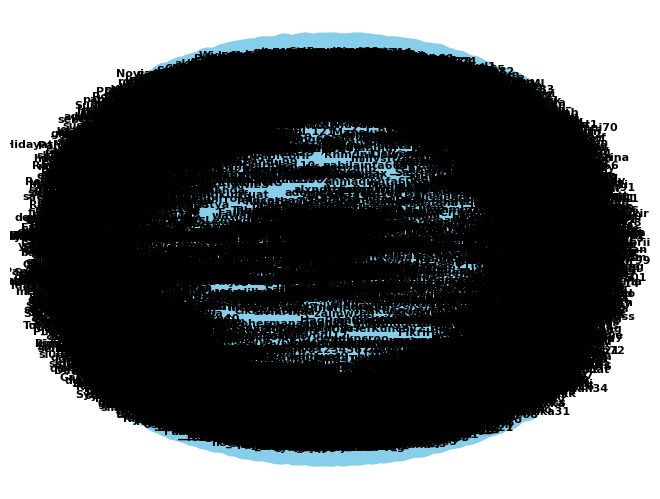

In [15]:
# Create TwitterGraph instance
all_graph = TwitterGraph(df_all)

# Calculate feature_indegree(for generating node)
all_graph.calculate_feature_indegree()

# Drop unused feeature
all_graph.drop_unused_features()

# Extract mention_list from mention on text
all_graph.extract_mention_list_from_text()

# Generate new random node
new_data = all_graph.generate_new_data()

# Add new node to DataFrame
all_graph.add_new_data_to_dataframe(new_data)

# Add nodes and edges
all_graph.add_nodes_and_edges()

# Collect centrality measurement
all_centrality = all_graph.calculate_centralities()

# Visualize the graph
all_graph.visualize_graph()

##Centrality Measurement

In [16]:
all_graph.display_centrality_measurement(all_centrality)

,Node,Betweenness Centrality
0,aniesbaswedan,7.296388e-06
1,gusniindera,4.664904e-06
2,hanny23ae,2.093226e-06
3,f_wandal3,1.953678e-06
4,bro_munozz,9.967743e-07
5,ZoneVenomWar,8.771614e-07
6,viverepericls,8.173549e-07
7,muchlis_ar,7.376130e-07
8,MaxJo777,5.980646e-07
9,ironmxn6,5.781291e-07


,Node,In-Degree Centrality
0,aniesbaswedan,0.041225
1,bangbonny_,0.023578
2,Reiza_Patters,0.014259
3,Arie_Kriting,0.010871
4,geloraco,0.008753
5,prabowo,0.008753
6,rihandaulah,0.005789
7,tvOneNews,0.005506
8,imanlagi,0.005365
9,muchlis_ar,0.005224


,Node,Out-Degree Centrality
0,gusniindera,0.002400
1,guitar0512mi,0.002259
2,hanny23ae,0.001977
3,AntoniCleo,0.001977
4,ekanzoy,0.001977
5,grupchavez,0.001977
6,harasjoman,0.001835
7,YayiekY,0.001835
8,Ganjar_Mahfud03,0.001835
9,f_wandal3,0.001835


,Node,Degree Centrality
0,aniesbaswedan,0.041367
1,bangbonny_,0.023578
2,Reiza_Patters,0.014259
3,Arie_Kriting,0.010871
4,geloraco,0.008753
5,prabowo,0.008753
6,rihandaulah,0.005789
7,tvOneNews,0.005506
8,muchlis_ar,0.005365
9,imanlagi,0.005365


,Node,Closeness Centrality
0,aniesbaswedan,0.042309
1,bangbonny_,0.023578
2,kojekrapbetawi,0.023361
3,Reiza_Patters,0.014291
4,Arie_Kriting,0.011101
5,prabowo,0.009616
6,geloraco,0.008762
7,tvOneNews,0.007468
8,imanlagi,0.006589
9,gibran_tweet,0.006124


,Node,Eigenvector Centrality
0,kumparan,0.652668
1,viverepericls,0.403371
2,fmyvfnkoig,0.403371
3,S4triaBaj4,0.249297
4,ImAShyPerson820,0.249297
5,udahdebut,0.249297
6,akun_0987654321,0.249297
7,VIVAcoid,0.001269
8,strike_bravo_b,0.001142
9,alextham878,0.000635


#Convert to xlsx

In [18]:
anies_graph.df.to_excel('anies_dataset.xlsx')
prabowo_graph.df.to_excel('prabowo_dataset.xlsx')
ganjar_graph.df.to_excel('ganjar_dataset.xlsx')
df_all.to_excel('all_dataset.xlsx')

convert to xlsx format for gephi visualitation

In [28]:
dataset = [anies_graph.df,prabowo_graph.df,ganjar_graph.df,df_all]
dataset_name = ['anies_edges','prabowo_edges','ganjar_edges','all_edges']

In [29]:
i = 0
for data in dataset:
    expanded_df = data.explode('mention_list')
    edges_df = expanded_df[['username', 'mention_list']].rename(columns={'username': 'source', 'mention_list': 'target'})
    edges_df = edges_df.dropna(subset=['target'])
    edges_df.to_excel(dataset_name[i]+'.xlsx')
    i = i + 1